对20个节点用chebyshev内插，然后对41个点给出两者的差，并画图显示

构建21个节点

In [1]:
import numpy as np
k = np.arange(0,20,1)
x = np.cos(np.pi * (k+1/2)/20)
print(k)
print(x)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 0.99691733  0.97236992  0.92387953  0.85264016  0.76040597  0.64944805
  0.52249856  0.38268343  0.23344536  0.0784591  -0.0784591  -0.23344536
 -0.38268343 -0.52249856 -0.64944805 -0.76040597 -0.85264016 -0.92387953
 -0.97236992 -0.99691733]


函数f(x)和21个节点的y值

In [2]:
def f(x):
    return 1/(1+25*x*x)
print(f(x))

[0.03869055 0.0405884  0.04476509 0.05215156 0.06470218 0.08662082
 0.12779359 0.21453863 0.42329504 0.86662942 0.86662942 0.42329504
 0.21453863 0.12779359 0.08662082 0.06470218 0.05215156 0.04476509
 0.0405884  0.03869055]


创建参数列表c，并根据公式（见ppt）计算每个c的值
注意，c0的值在计算时已经考虑过delta，也就是说S(x)的表达式中不再需要-c0/2

In [3]:
c=[0] * 20
c[0] = np.sum(f(x))/20
print(c[0])
for m in range(1,20):
    res = np.cos(m*np.pi*(k+1/2)/20)
    c[m] = np.sum(res * f(x))/10
print(c)

0.1959775268880164
[0.1959775268880164, 2.0816681711721684e-18, -0.26331145807811546, 2.0816681711721684e-18, 0.17679769567269657, -1.3183898417423734e-16, -0.11857156457490899, 1.5751289161869408e-16, 0.07931688380910715, 9.020562075079397e-18, -0.05275290445276219, -4.5102810375396984e-17, 0.03462938980885905, -3.2612801348363975e-17, -0.022046577534373796, 1.9931972738973515e-16, 0.012991217665388424, -3.2265856653168614e-17, -0.0060144526228647684, -3.8640965427383376e-17]


定义chebyshev函数，并用其计算20个节点的y值

In [4]:
def chebyshev(x):
    res = 0
    for i in range(20):
        res += c[i] * np.cos(i*np.arccos(x))
    return res
chey = chebyshev(x)
print(chey)

[0.03869055 0.0405884  0.04476509 0.05215156 0.06470218 0.08662082
 0.12779359 0.21453863 0.42329504 0.86662942 0.86662942 0.42329504
 0.21453863 0.12779359 0.08662082 0.06470218 0.05215156 0.04476509
 0.0405884  0.03869055]


构建41个点，然后分别用f(x)和chebyshev(x)计算y值，并给出差

In [5]:
xshowlist = np.arange(-1,1.05,0.05)
fshowlist = f(xshowlist)
chshowlist = chebyshev(xshowlist)
print(fshowlist)
print(chshowlist)
print(chshowlist-fshowlist)

[0.03846154 0.04244032 0.04705882 0.05245902 0.05882353 0.06639004
 0.0754717  0.08648649 0.1        0.11678832 0.13793103 0.16494845
 0.2        0.24615385 0.30769231 0.3902439  0.5        0.64
 0.8        0.94117647 1.         0.94117647 0.8        0.64
 0.5        0.3902439  0.30769231 0.24615385 0.2        0.16494845
 0.13793103 0.11678832 0.1        0.08648649 0.0754717  0.06639004
 0.05882353 0.05245902 0.04705882 0.04244032 0.03846154]
[0.03701576 0.04084866 0.0486852  0.05226088 0.05671349 0.0671692
 0.07825215 0.0865337  0.09641294 0.11412551 0.14052347 0.17112412
 0.20276314 0.2401748  0.29633274 0.38533503 0.51189455 0.6638541
 0.81260597 0.92207346 0.96240967 0.92207346 0.81260597 0.6638541
 0.51189455 0.38533503 0.29633274 0.2401748  0.20276314 0.17112412
 0.14052347 0.11412551 0.09641294 0.0865337  0.07825215 0.0671692
 0.05671349 0.05226088 0.0486852  0.04084866        nan]
[-1.44578188e-03 -1.59165598e-03  1.62638035e-03 -1.98134879e-04
 -2.11003585e-03  7.79157629e-04 

<ipython-input-4-0192cb001ba6>:4: RuntimeWarning: invalid value encountered in arccos
  res += c[i] * np.cos(i*np.arccos(x))


画图显示两条曲线

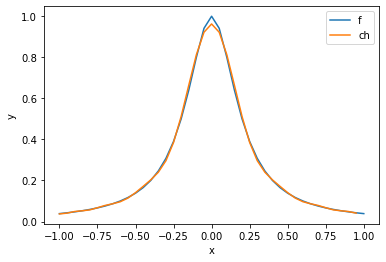

In [6]:
import matplotlib.pyplot as plt

plt.plot(xshowlist, fshowlist, label='f')
plt.plot(xshowlist, chshowlist, label='ch')

plt.legend()

plt.xlabel('x')
plt.ylabel('y')

plt.show()

导出数据

In [7]:
# import pandas as pd
# df = pd.DataFrame({'Column1': xshowlist, 'Column2': fshowlist, 'Column3': chshowlist, 'Column4': fshowlist-chshowlist})

# df.to_excel('output1.xlsx', index=False)